# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [1]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [2]:
housing_features[0]

array([  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
         0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
         6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
         2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
         4.98000000e+00])

In [3]:
# Number of houses in the dataset
total_houses = len(housing_prices)

# Number of features in the dataset
total_features = housing_features.shape[1]

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: **
If I would pick three significant features purly based on intuition, I would have to say **RM**, **CHAS**, **DIS**. If a family has children, **PTRATIO** is another important feature. **RM** gives the number of rooms, which is certainly an imporant feature of a house. **CHAS** indicates if the house tracts bounds of the Charles river or not. This is important because rich people would prefer house locations near buteaful places such as rivers, lakes, mountains, and so on. **DIS** measures the distance from home to work, which is anonther important feature, especially for people who don't own cars. 

## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [4]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


In [5]:
chosen_features = ['RM', 'CHAS', 'DIS']
features = city_data.feature_names.tolist()
for feature in chosen_features:
    index = features.index(feature)
    print(feature + ': ' + str(CLIENT_FEATURES[0][index]))

RM: 5.609
CHAS: 0
DIS: 1.385


**Answer: **
5.609 is the **RM** value; 0 is the **CHAS** value; 1.385 is the **DIS** value

# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [6]:
# Put any import statements you need for this code block here
from sklearn.cross_validation import train_test_split

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
    
    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: **
Because the purpose of machine learning is to fit a model with known dataset, and make predictions on unseen dataset. If we don't have testing data, and use all of the data for training, the fitted model might have good performance on the training data, but poor performance on the generalization; this is often called **overfitting** or **high variance**

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [7]:
# Put any import statements you need for this code block here
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_absolute_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **
I chose the **mean_absolute_error** as the error metric. **Accuracy**, **Precision** and **Recall** are more suitable for classification problems, but this project is about regression. Although **F1 Score** can be used in regression problems based on the **P value**, but I found it not that intuitive to explain. **MSE** and **MAE** are both good metrics for regressions, but **MAE** is better, since it is robust to outliers, according to Scikit Learng's User Guide. Note that **MSE** converges faster to the solution while **MAE** is more robust to outliers. Notice that although **MSE** punishes larger errors more heavily than **MAE** they both guide the model to almost the same solution if no outliers are present and enough iterations are performed. 

## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 3**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [8]:
# Put any import statements you need for this code block
from sklearn import grid_search
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer

custom_scorer = make_scorer(score_func = performance_metric, greater_is_better = False)

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = performance_metric

    # Make the GridSearchCV object
    reg = grid_search.GridSearchCV(regressor, parameters, scoring=custom_scorer)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg


# reg = fit_model(housing_features, housing_prices)
# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

reg.best_params_

Successfully fit a model!


{'max_depth': 6}

In [9]:
reg.score(X_test, y_test)

/Users/yexu/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/grid_search.py:418: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


-1.5382326738253516

## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **
<br>
According to the Scikit Learn Document: "Parameters that are not directly learnt within estimators can be set by searching a parameter space for the best Cross-validation score." Basically, there are certain amount of **hyper-parameters** for each learning algorithm that cannot be learnt automatically. You might need to pick a value in prior to training. Different situations might need fine-tuning with different values for the hyper-parameters. One simple approach to find good hyper-parameters is to use the Grid-Search method, which is an Exhaustive Search algorithm that will pick the parameters with the best cross-validation score. Note that sometimes a randomized search is preferrable, for example, if the number of hyper-parameters is huge, the search time would grow exponentially, in such a case a randomized search is applicable. 

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: **
<br> Sometimes, there are certain hyper-parameters that we might want to tune for a particular learning model. A typical approach to find a good hyper-paramter combination is to use GridSearch or Randomized Search, and pick the one with the best score. We shouldn't use the test dataset to measure the scores, since this would make the test-set to become part of the training process. We shouldn't use the training-set for search either, since it would cause over-fitting. Therefore, we use a third dataset, a cross-validation set, to tune the model, and then use the test-set for the final testing.

* More on the k-fold cross validation: - the data set is divided into k subsets, and the holdout method is repeated k times. Each time, one of the k subsets is used as the test set and the other k-1 subsets are put together to form a training set. Then the average error across all k trials is computed. The advantage of this method is that it matters less how the data gets divided. Every data point gets to be in a test set exactly once, and gets to be in a training set k-1 times
* It maximize the dataset for training and testing, so that the data we can use to provide best learning result and best validation - this is extremely useful when the dataset is limited in size as Grid Search will allow an extensive exploitation of available data.
* CV helps with grid search to ensure that overfitting would not happend. Note that if we limit grid search to single testing set, we may accidentally over fit our model if the split testing set is imbalanced. Using cross validation the parameters will be optimized on the entire data set and any random anomalies due to random splitting will be removed.

# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [10]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(15,10))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate(np.arange(1, 11)):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(5, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [11]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(10, 8))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


/Users/yexu/miniconda3/envs/py27/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


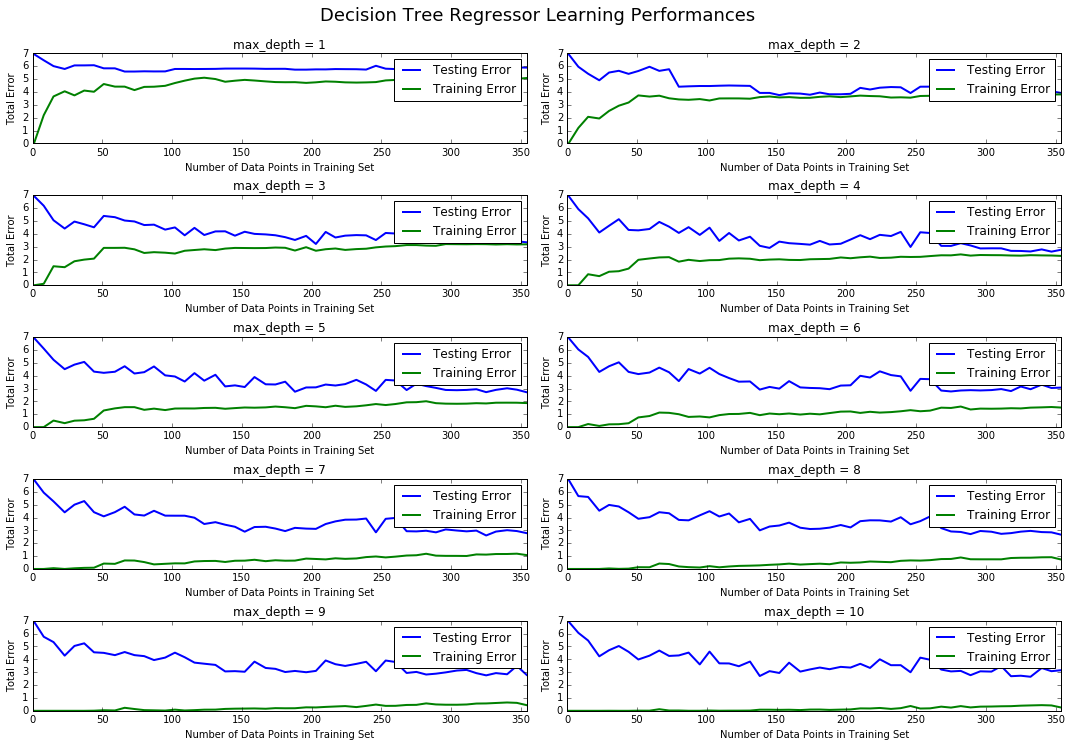

In [12]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **
<br>  
<br> If we choose the max_depth as 4 or 5, we can see a best test error combined with the reasonable training error. Let's just say we choose 4, as the size of the training set increases, the training error increases. This is because if we have only a few training samples, the learning model will most likely overfit the data, leading to a very small training error. But since the training sample is very small, the model will not predict the unseen data well, that is why the testing error is very high initially. On the other hand, as the training set increases, the testing error decreases, since for the problem of "overfit", increasing training size will actually help to improve the model deneralization. But up to a certain point, testing error and training error will converge, and from this point on, even increasing the training set size won't help. 

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **
<br> As explained above, max_depth of 1 means a high bias, whereas max_depth of 10 means a high variance.
<br> For max_depth as 1, it suffers both from the trainig and test error, no matter how we increase the data set size, this is an indicator of high bias. For max_depth as 10, we can see the training error is almost 0, while the test error is much bigger. But as we increase the data set size, we see a trend of reducing the test error, this is tyically an indicator of high variance, which can be improved by providing more data.

Creating a model complexity graph. . . 


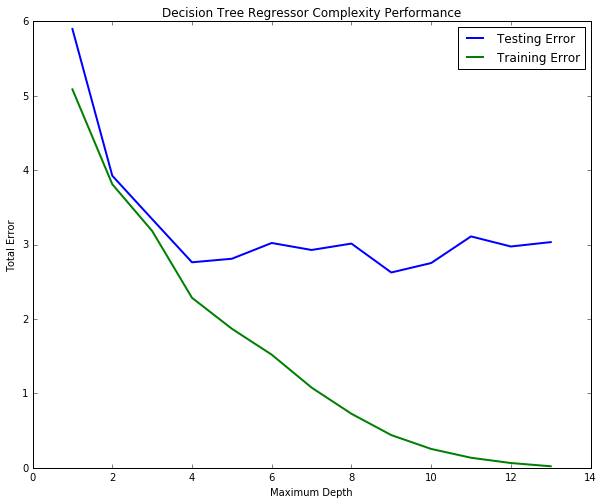

In [13]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **
As the max_depth increases, both training and testing error decrease initially. But at a certain point, the testing error remains the same, while the training error continues decreasing, which means an overfitting. I would pick that particula point, which corresponds to a max_depth of 4.

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [14]:
print "Final model has an optimal max_depth parameter of", reg.best_params_

Final model has an optimal max_depth parameter of {'max_depth': 6}


**Answer: **
<br> using reg.best_params, I found, as expected, the best max_depth is 4

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [15]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 20.766


**Answer: **
<br> The predicted value of the house is 21.630, which is within one standard deviation of both the mean and the median value from the statistics. This means this prediction does make sense.

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **
<br> This model is a reasonable one, since the R^2 score that I used on the test set is fairly high (0.96), which means it can generalize pretty well. I would use this model to predict the selling price.

<br> As a general rule of thumb, I would also like to try other models for comparison, such as the linear regression, SVM, etc. Then I will pick the best model in terms of the performance metrics I used in this example. For example, below is an illustration of using linear regression to fit the data.

In [16]:
### Fit a linear model 
import statsmodels.api as sm
import pandas as pd

In [17]:
X_train_df = pd.DataFrame(X_train, columns=features)
y_train_df = pd.DataFrame(y_train, columns=['medv'])

In [18]:
ols = sm.OLS(y_train_df, X_train_df)
result = ols.fit()

In [19]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     533.4
Date:                Wed, 15 Jun 2016   Prob (F-statistic):          1.37e-217
Time:                        23:21:10   Log-Likelihood:                -1087.0
No. Observations:                 354   AIC:                             2200.
Df Residuals:                     341   BIC:                             2250.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
CRIM          -0.0562      0.046     -1.220      0.223        -0.147     0.034
ZN             0.0637      0.020      3.202      0.001         0.025     0.103
INDUS          0.0174      0.082      0.211      0.833        -0.144     0.179
CHAS           2.4539      1.053      2.330      0.020         0.383     4.525
NOX           -2.4128      4.191     -0.576      0.565       -10.656     5.830
RM             5.4652      0.398     13.727      0.000         4.682     6.248
AGE           -0.0034      0.018     -0.189      0.850        -0.038     0.032
DIS           -0.9164      0.262     -3.499      0.001        -1.432    -0.401
RAD            0.1276      0.089      1.432      0.153        -0.048     0.303
TAX           -0.0084      0.005     -1.588      0.113        -0.019     0.002
PTRATIO       -0.2530      0.147     -1.725      0.085        -0.541     0.035
B              0.0138      0.004      3.934      0.000         0.007     0.021
LSTAT         -0.4496      0.064     -7.024      0.000        -0.576    -0.324
==============================================================================
Omnibus:                      150.099   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              913.288
Skew:                           1.671   Prob(JB):                    4.81e-199
Kurtosis:                      10.124   Cond. No.                     8.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""